In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from textblob import TextBlob

from relative_popularity_reports import load_and_process

%matplotlib inline

### Preview UFO Database Reports Data

In [2]:
df = load_and_process('data/data.pkl')
df.drop_duplicates(inplace=True)
df.head()

,city,state,occurred,shape,duration,report,duration_clean,occurred_clean,Hour_of_day,date,month-year,year
0,"Camp McGregor, NM",NM,5/6/2017 05:00,Light,10 minutes,Light seen over mountain's east of Camp McGreg...,600,2017-05-06 05:00:00,5.0,2017-5-6,2017-5,2017.0
2,"Austin, TX",TX,5/5/2017 11:30,Disk,3 seconds,"Flying saucer descends, possibly lands in Nort...",3,2017-05-05 11:30:00,11.0,2017-5-5,2017-5,2017.0
3,"El Mirage, AZ",AZ,5/5/2017 03:00,Circle,30 seconds,"While letting my dog out, a very bright white ...",30,2017-05-05 03:00:00,3.0,2017-5-5,2017-5,2017.0
4,"York, NE",NE,5/4/2017 23:34,Fireball,0:18,A fire ball was moving in the atmosphere while...,18,2017-05-04 23:34:00,23.0,2017-5-4,2017-5,2017.0
5,"Onchiota, NY",NY,5/4/2017 23:25,Unknown,1 minute,craft following above carI saw a light reflect...,60,2017-05-04 23:25:00,23.0,2017-5-4,2017-5,2017.0


### Count how many reports containing the word 'abducted'

In [3]:
abducted = df[df['report'].str.contains('abducted')]
len(abducted)

293

### Count how many reports contain youtube.com hyperlinks

In [4]:
youtube = df[df['report'].str.contains('youtube.com/')]
len(youtube)

265

In [8]:
nuforc_note = df[df['report'].str.contains('NUFORC Note')]
len(nuforc_note)
len(df)

93784

### Estimate no. of reports NUFORC seeked or made contact with a witness 

In [5]:
nuforc1 = df[(df['report'].str.contains('NUFORC Note')) & (df['report'].str.contains('contacted'))]
nuforc2 = df[(df['report'].str.contains('NUFORC Note')) & (df['report'].str.contains('talked'))]

nuforc = nuforc1.merge(nuforc2, how='outer', left_index=True, right_index=True)
len(nuforc)

788

### List the top 15 cities which report sightings the most

In [7]:
df_cities = pd.DataFrame(df.groupby('city')['report'].nunique())
top_15_cities = df_cities.sort_values('report', ascending=False)[:15]
top_15_cities

,report
city,
"Seattle, WA",633
"Phoenix, AZ",620
"Las Vegas, NV",497
"San Diego, CA",422
"Los Angeles, CA",419
"Chicago, IL",357
"Houston, TX",350
"Tucson, AZ",333
"Orlando, FL",299


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

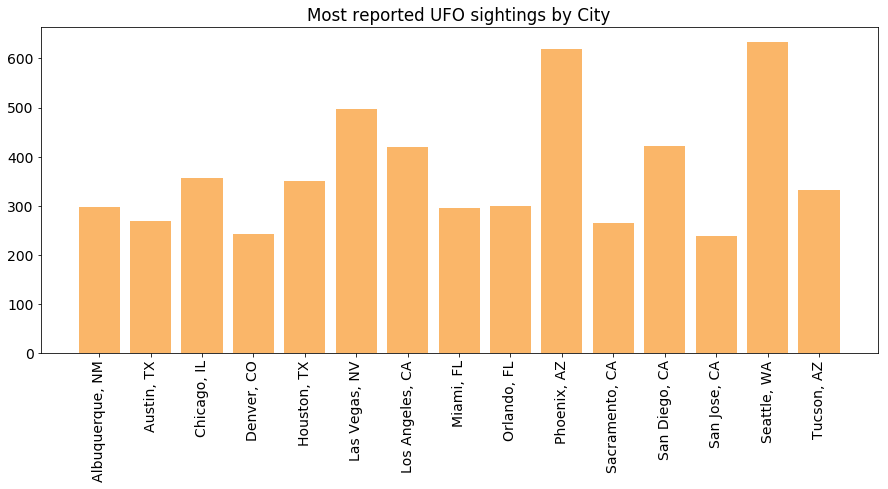

In [8]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,6))
plt.bar(top_15_cities.index, top_15_cities['report']
       ,color ='#FAB669')
plt.title('Most reported UFO sightings by City')
plt.xticks(rotation=90)

### Exploratory NLP: Sentiment Analysis

In [29]:
# Polarity: using TextBlob, asssess the sentiment of each report text: negative sentiment(-1) and positive sentiment(+1)

def explore_sentiment_polarity(df, neg_threshold, pos_threshold):
    for i in range(0,len(df)): 
        text = df.iloc[i]['report']
        report_test = TextBlob(text)
        if report_test.sentiment.polarity < neg_threshold or report_test.sentiment.polarity > pos_threshold:
            print ('Row_ID:',i, report_test.sentiment.polarity)
            print (text, '\n')

            
explore_sentiment_polarity(df, -0.75, 0.75)

Row_ID: 818 1.0
My friend and I were driving when we saw this circle object floating in the sky,  it wasn't moving at all,  when we passed under the object, we could perfectly see that it was a circle UFO with a lot of lights and no sounds. 

Row_ID: 4089 0.8
Sitting on porch, orange colored ball traveling north-northeast to south-southwest.  Went across the sky at great speed and disappeared. 

Row_ID: 6272 0.8
Laying in chair watching stars.  Saw lighted object fly across sky in about 5 seconds flying west to east.  The color was Amber like.  Flying in one line across.  Or side by side. 

Row_ID: 8805 1.0
FOUR ORANGE LIGHTS IN PERFECT ALIGNMENTFOUR LIGHTS IN PERFECT ALIGNMENT 

Row_ID: 9551 0.8
This thing was dripping fire, Ball lightening, comet maybe.This thing was dripping fire, Ball lightening, comet, maybe God.  lol  When I tried to zoom in I would lose it.&lt;iframe width="560" height="315" src=https://www.youtube.com/embed/DijFTU4B8IE" frameborder="0" allowfullscreen&gt;&lt;/i

In [ ]:
# Subjectivity: using TextBlob, assess corpus for subjectivity: very objective(0) and very subjective(1)

def explore_sentiment_subjectivity(df, sub_threshold, obj_threshold):
    
    subjective = 0
    neutral = 0
    objective = 0
    
    for i in range(0,len(df)): 
        text = df.iloc[i]['report']
        report_test = TextBlob(text)
        if report_test.sentiment.subjectivity > sub_threshold:
            subjective += 1
        if report_test.sentiment.subjectivity < obj_threshold:
            objective += 1

    print ('Subjective', subjective)
    print ('Objective', objective)
    
    
explore_sentiment_subjectivity(df, 0.5, 0.2)

Genrally polarity is skewed towards objective side rather than subjective.

In [11]:
total = len(df)
print(total)

93784
